# Mnist Classification

In [54]:
import tensorflow as tf
import numpy as np

## 케라스 내장 데이터 셋
- boston_housing : 보스톤 주택 가격
- clfar10 : 이미지 분류
- clfar100 : 이미지 분류
- mnist : 손글씨
- fashio_mnist : 의류 이미지 데이터
- imdb : 영화 데이터(평가글)
- reuters : 뉴스 토픽


In [55]:
mnist = tf.keras.datasets.mnist

In [56]:
print(type(mnist))

<class 'module'>


In [57]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # 알아서 train test로 나누어 줌 

In [58]:
print('train set : ', x_train.shape, y_train.shape)
print('test set : ', x_test.shape, y_test.shape)

train set :  (60000, 28, 28) (60000,)
test set :  (10000, 28, 28) (10000,)


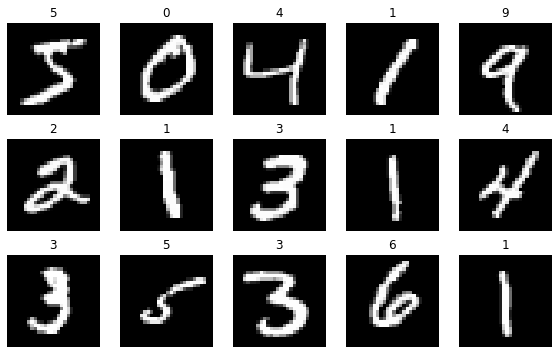

In [59]:
# 데이터 시각화
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,5)  # 화면의 크기 3 * 5
fig.set_size_inches(8,5)

for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [60]:
# 데이터 전처리
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [61]:
# 픽셀 값의 최소 / 최대 값 확인

print(f'정규화 전 최소값: {x_train.min()}.최대값: {x_train.max()}')

정규화 전 최소값: 0.최대값: 255


In [62]:
# 데이터 정규화
x_train = x_train / x_train.max()

In [63]:
print(f'정규화 후 최소값: {x_train.min()}.최대값: {x_train.max()}')

정규화 후 최소값: 0.0.최대값: 1.0


In [64]:
x_test = x_test / x_test.max()

In [65]:
print(f'정규화 후 최소값: {x_test.min()}.최대값: {x_test.max()}')

정규화 후 최소값: 0.0.최대값: 1.0


In [66]:
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [67]:
# Flatten 레이어
print(f'변경전 shape {x_train.shape}')
print(f'10로 shape 변경 후 {x_train.reshape(60000,-1).shape}')  # 끝에 하나 자름 -1

변경전 shape (60000, 28, 28)
10로 shape 변경 후 (60000, 784)


In [68]:
print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

Flatten 적용 후 : (60000, 784)


In [69]:
# 활성화 함수
tf.keras.layers.Dense(units=128, activation='relu')

In [70]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(128),
                            tf.keras.layers.Activation('relu')
                            ])

In [71]:
# 입출력 (DNN 딥뉴런 네트워크 .. 5개 이상이어야 deep)
model = tf.keras.Sequential([
                                    tf.keras.layers.Flatten(input_shape =(28,28)),
                                    tf.keras.layers.Dense(255, activation='relu'),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(16, activation='relu'),
                                    # 마지막 출력노드 = 10 (분류개수)
                                    tf.keras.layers.Dense(10, activation='softmax')
                                    ])

In [72]:
# 마지막 출력층 노드 = 1 인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 마지막 출력층 노드가 = 10인 경우( 다중 ), softmax
tf.keras.layers.Dense(10, activation='softmax')

# 입력층, 출력층 중요 데이터 모양의 갯수 맞추는 것(처음) , 몇개로 분류할 건지 (마지막)

In [73]:
# 손실함수
# 마지막 출력층 노드 = 1 인 경우
model.compile(loss='binary_crossentropy')

# 마지막 출력층 노드 = 10 인 경우(여러 개), 원 핫 벡터인 경우 [0., 1., 0., ...] 
model.compile(loss= 'categorical_crossentropy')

# 마지막 출력층 노드 = 10 인 경우(여러 개), 원 핫 벡터가 아닌 경우
model.compile(loss= 'sparse_categorical_crossentropy')

In [74]:
# 밑에 두 방법중 편한거 쓰셈
# Optimizer (경사 하강, Adam..추천) - gradient 가 필요 하이퍼파라미터
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [75]:
# 평가지표 (어떤 것을 볼지 정해야 함.. 업무 성격에 따라 )
acc = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[acc])


# 문자열 지정
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
# 훈련 ( train, validation, test data 로 구분해서 )
model.fit(x_train, y_train,
        # 검증 셋 지정
          validation_data =(x_test, y_test),
          epochs=10
          )

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2443 - accuracy: 0.9258 - val_loss: 0.1160 - val_accuracy: 0.9658
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0960 - accuracy: 0.9705 - val_loss: 0.0937 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0686 - accuracy: 0.9784 - val_loss: 0.0780 - val_accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9840 - val_loss: 0.0883 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0429 - accuracy: 0.9864 - val_loss: 0.0745 - val_accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0860 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0822 - val_accuracy:

In [77]:
# 검증, 평가 (evaluate 로 검증)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증셋 정확도 : ', test_acc, test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9806
검증셋 정확도 :  0.9805999994277954 0.08246935904026031


In [78]:
# 예측
predictions = model.predict(x_test)

In [79]:
predictions.shape

(10000, 10)

In [81]:
print(predictions[0])

[5.1530709e-09 1.0082804e-05 1.6295369e-06 2.4999524e-04 2.0188918e-07
 1.4512745e-05 1.2105700e-09 9.9970108e-01 7.8870823e-07 2.1679265e-05]


In [82]:
print(np.argmax(predictions[0]))

7


In [84]:
print(np.argmax(predictions[:10], axis = 1))

[7 2 1 0 4 1 4 9 5 9]


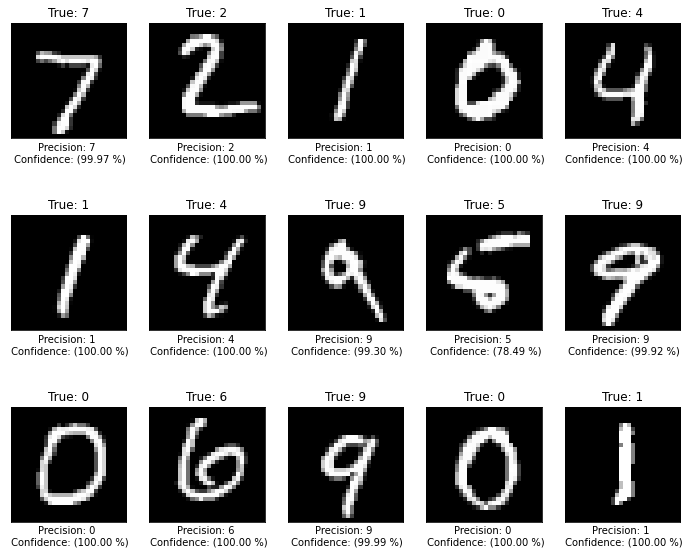

In [89]:
# 예측 결과 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Precision: {y_pred} \n Confidence: ({confidence:.2f} %)')
plt.tight_layout
plt.show()